# Démarche à suivre

#### introduction

#### Modélisation

#### Exploration des donnés 

#### Netoyage des données
- types 
- valeurs Manquantes 

#### Détection des outliers

#### visualisation des données 

#### Etude de corrélation entre les caracteristiques 


#### Sélection des caractéristiques ????? et construction des modèles de classification


In [1]:

# ceci est un test 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print ('ceci est un teste')

ceci est un teste


In [3]:
data = pd.read_csv('/home/katia/Documents/workspace/DataKeen/Exemple_Base_Client .csv')


#on est dans un modèle de classsification binaire haut_revenu (true or false) 
on est amené dans cet exercice à identifier si un client a un énorme potentiel sur le site en se basant sur les profils des clients
dans ce cas nous devons étudier la correlation entre les caractéristiques décrivant les clients et haut revenu sur le site , mais avant cela nous devons préparé nos données 

In [4]:
#Exploration des données 
print(data.shape)

(10787, 10)


In [5]:
print (data.columns.values)

['Client_ID' 'Sexe' 'Age' 'Navigateur' 'OS' 'Pays' 'Geolocalisation'
 'Campagne' 'Moyenne_Pages_Visitees' 'Haut_Revenu']


### Apérçu des données 
Voici une observation de ce à quoi ressemblent les 10 premiers types de verre afin que nous puissions avoir une idée de l'ensemble de données.


In [6]:
data.head(10)

Client_ID Sexe   Age Navigateur       OS           Pays    Geolocalisation  \
0      6555    M  42.0     Chrome  Windows  United States   -78.3875 36.6676   
1     13226    F  18.0     Chrome  Windows        Belgium         4.35 50.85   
2     24448    F  71.0     Chrome  Windows          Japan   139.7677 35.6427   
3     31876    M  54.0     Chrome  MacOS X         Sweden    12.6944 56.0467   
4     39768    F   NaN     Chrome  Windows  United States   -83.7834 40.1183   
5     49054    F  60.0     Chrome  Windows         France          2.3 48.75   
6     58152    M  32.0     Chrome  Windows          Spain    -0.3667 39.4667   
7     65124    M  70.0    Firefox    Linux         Brazil  -45.0419 -21.2674   
8     73842    F  37.0     Chrome  MacOS X   South Africa   18.4166 -33.9166   
9     81756    F  48.0       Edge  Windows        Germany    10.5622 51.8998   

   Campagne  Moyenne_Pages_Visitees  Haut_Revenu  
0     False               12.333333        False  
1     False                6.000000        False  
2     False                9.500000        False  
3      True               10.333333        False  
4     False               11.000000        False  
5     False               10.333333        False  
6     False               11.500000        False  
7      True               16.000000        False  
8      True               11.000000        False  
9     False               15.000000        False

In [7]:
data.tail(10)


Client_ID Sexe   Age Navigateur       OS           Pays  \
10777    thzd9e    F  57.0     Chrome    Linux  United States   
10778    u4kumu    M   NaN     Chrome  Windows    Netherlands   
10779    uxavpz  NaN  35.0     Chrome  Windows  United States   
10780    vigpae  NaN  58.0     Chrome  Windows  United States   
10781    wa3q8y    M  16.0     Chrome  Windows          China   
10782    wtfo66    F  38.0     Chrome  Windows            NaN   
10783    xam34d    M  30.0    Firefox  Windows          China   
10784    y5mxbk    M  71.0     Chrome  Windows  United States   
10785    ysa7jr    F  17.0     Chrome  Windows          China   
10786    zkjjhi    M  54.0    Firefox  Windows  United States   

         Geolocalisation  Campagne  Moyenne_Pages_Visitees  Haut_Revenu  
10777  -117.8931 33.8768      True                    10.0        False  
10778     4.8995 52.3824      True                    14.0        False  
10779   -76.0192 36.9205      True                    11.0        False  
10780    -87.575 37.9971     False                    13.0        False  
10781   118.5858 24.9139     False                    15.0        False  
10782                NaN      True                    17.0        False  
10783   121.3997 31.0456      True                     7.0        False  
10784     -97.822 37.751     False                    12.0        False  
10785   116.3883 39.9289      True                    10.0        False  
10786  -104.9058 39.6384     False                     9.0        False

In [8]:
# print (data.head(10))



In [9]:
data['Haut_Revenu'].value_counts()

False    9794
True      993
Name: Haut_Revenu, dtype: int64

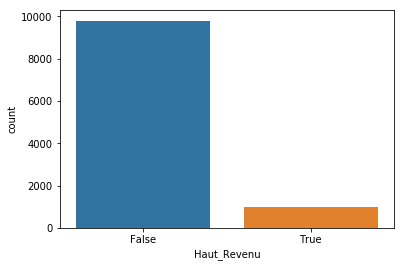

In [10]:
sns.countplot(data['Haut_Revenu'])
plt.show()

In [11]:
data.describe()

Age  Moyenne_Pages_Visitees
count  9896.000000            10787.000000
mean     48.028193               11.302421
std      16.353174                2.746313
min      14.000000                2.000000
25%      36.000000                9.500000
50%      49.000000               11.000000
75%      62.000000               13.000000
max      79.000000               28.000000

- remarque 
nous avons que 2 variables numeriques et comme les modèle de ML n'eccapte que des numérique nous allons procédé donc à la transformation de notre dataset 

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10787 entries, 0 to 10786
Data columns (total 10 columns):
Client_ID                 10787 non-null object
Sexe                      9687 non-null object
Age                       9896 non-null float64
Navigateur                10787 non-null object
OS                        10787 non-null object
Pays                      10490 non-null object
Geolocalisation           10514 non-null object
Campagne                  10787 non-null bool
Moyenne_Pages_Visitees    10787 non-null float64
Haut_Revenu               10787 non-null bool
dtypes: bool(2), float64(2), object(6)
memory usage: 695.3+ KB


In [13]:
data.isnull().any()

Client_ID                 False
Sexe                       True
Age                        True
Navigateur                False
OS                        False
Pays                       True
Geolocalisation            True
Campagne                  False
Moyenne_Pages_Visitees    False
Haut_Revenu               False
dtype: bool

In [14]:
# data.isnull().sum()
data.isnull().sum().sort_values(ascending=False)


Sexe                      1100
Age                        891
Pays                       297
Geolocalisation            273
Haut_Revenu                  0
Moyenne_Pages_Visitees       0
Campagne                     0
OS                           0
Navigateur                   0
Client_ID                    0
dtype: int64

### missing values 

- pour completer les valeurs manquantes Numérique continue on à plusieurs méthodes prenant l'exemple d'âge
- 1. générer des nombres aléatoires entre la moyenne et l'écart-type.
- 2. Une façon plus précise de deviner les valeurs manquantes est d'utiliser d'autres caractéristiques corrélées 
- 3. Combinez les méthodes 1 et 2. Ainsi, au lieu de deviner les valeurs d'âge basées sur la médiane, 
- 4. la solution la plus simple est de supprimer les valeurs manquante mais cependant faut verifier si ça ne fausse pas les résultats d'apprentissage  




In [15]:
data = pd.read_csv('/home/katia/Documents/workspace/DataKeen/Exemple_Base_Client .csv')
data=data.drop(['Geolocalisation'], axis=1)
data=data.drop(['Client_ID'], axis=1)


In [16]:


# c'est pas la bonne solution nous allons revenir sur drope missing values
data= data.dropna()
data.isnull().sum()

Sexe                      0
Age                       0
Navigateur                0
OS                        0
Pays                      0
Campagne                  0
Moyenne_Pages_Visitees    0
Haut_Revenu               0
dtype: int64

In [17]:
def to_index(df, col):
  _map = { v:k for k, v in dict(enumerate(df[col].unique())).items() }
  df[col+'_Num'] = df[col].map(_map)
  
to_index(data, 'Sexe')
to_index(data, 'Navigateur')
to_index(data, 'OS')
to_index(data, 'Pays')
to_index(data, 'Campagne')
to_index(data, 'Haut_Revenu')

# data.head()
data.tail(10)

Sexe   Age Navigateur       OS               Pays  Campagne  \
10773    F  44.0     Safari  MacOS X             Russia      True   
10774    M  53.0     Chrome  Windows              China     False   
10775    M  49.0     Chrome  Windows  Republic of Korea     False   
10776    M  38.0    Firefox  Windows              China     False   
10777    F  57.0     Chrome    Linux      United States      True   
10781    M  16.0     Chrome  Windows              China     False   
10783    M  30.0    Firefox  Windows              China      True   
10784    M  71.0     Chrome  Windows      United States     False   
10785    F  17.0     Chrome  Windows              China      True   
10786    M  54.0    Firefox  Windows      United States     False   

       Moyenne_Pages_Visitees  Haut_Revenu  Sexe_Num  Navigateur_Num  OS_Num  \
10773                     8.5        False         1               4       1   
10774                    11.5        False         0               0       0   
10775                     5.0        False         0               0       0   
10776                    12.5        False         0               1       0   
10777                    10.0        False         1               0       2   
10781                    15.0        False         0               0       0   
10783                     7.0        False         0               1       0   
10784                    12.0        False         0               0       0   
10785                    10.0        False         1               0       0   
10786                     9.0        False         0               1       0   

       Pays_Num  Campagne_Num  Haut_Revenu_Num  
10773        22             1                0  
10774         9             0                0  
10775        24             0                0  
10776         9             0                0  
10777         0             1                0  
10781         9             0                0  
10783         9             1                0  
10784         0             0                0  
10785         9             1                0  
10786         0             0                0

In [18]:
# data.dtypes

data= data.select_dtypes(exclude=['object']) 
data= data.select_dtypes(exclude=['bool']) 

In [19]:
data.head()

Age  Moyenne_Pages_Visitees  Sexe_Num  Navigateur_Num  OS_Num  Pays_Num  \
0  42.0               12.333333         0               0       0         0   
1  18.0                6.000000         1               0       0         1   
2  71.0                9.500000         1               0       0         2   
3  54.0               10.333333         0               0       1         3   
5  60.0               10.333333         1               0       0         4   

   Campagne_Num  Haut_Revenu_Num  
0             0                0  
1             0                0  
2             0                0  
3             1                0  
5             0                0

In [20]:
data.dtypes

Age                       float64
Moyenne_Pages_Visitees    float64
Sexe_Num                    int64
Navigateur_Num              int64
OS_Num                      int64
Pays_Num                    int64
Campagne_Num                int64
Haut_Revenu_Num             int64
dtype: object

In [21]:
data.describe()

Age  Moyenne_Pages_Visitees     Sexe_Num  Navigateur_Num  \
count  8650.000000             8650.000000  8650.000000     8650.000000   
mean     48.090405               11.308754     0.496301        0.565318   
std      16.291963                2.750249     0.500015        1.177093   
min      14.000000                2.000000     0.000000        0.000000   
25%      36.000000                9.500000     0.000000        0.000000   
50%      49.000000               11.000000     0.000000        0.000000   
75%      62.000000               13.000000     1.000000        1.000000   
max      79.000000               25.000000     1.000000        4.000000   

            OS_Num     Pays_Num  Campagne_Num  Haut_Revenu_Num  
count  8650.000000  8650.000000   8650.000000      8650.000000  
mean      0.384971    12.495491      0.342775         0.089364  
std       0.593452    19.609479      0.474664         0.285285  
min       0.000000     0.000000      0.000000         0.000000  
25%       0.000000     0.000000      0.000000         0.000000  
50%       0.000000     6.000000      0.000000         0.000000  
75%       1.000000    15.000000      1.000000         0.000000  
max       2.000000   133.000000      1.000000         1.000000

### étude de corrélation entre les données


In [22]:
corr_data= data.corr()
corr_data

Age  Moyenne_Pages_Visitees  Sexe_Num  \
Age                     1.000000               -0.054563  0.000240   
Moyenne_Pages_Visitees -0.054563                1.000000  0.008433   
Sexe_Num                0.000240                0.008433  1.000000   
Navigateur_Num          0.010707               -0.007276  0.014555   
OS_Num                 -0.011134               -0.001360  0.012983   
Pays_Num               -0.003879                0.003073  0.004727   
Campagne_Num           -0.034478               -0.124119 -0.006105   
Haut_Revenu_Num         0.141796               -0.140559 -0.019161   

                        Navigateur_Num    OS_Num  Pays_Num  Campagne_Num  \
Age                           0.010707 -0.011134 -0.003879     -0.034478   
Moyenne_Pages_Visitees       -0.007276 -0.001360  0.003073     -0.124119   
Sexe_Num                      0.014555  0.012983  0.004727     -0.006105   
Navigateur_Num                1.000000  0.226506  0.007744     -0.012658   
OS_Num                        0.226506  1.000000  0.025733     -0.006337   
Pays_Num                      0.007744  0.025733  1.000000      0.005961   
Campagne_Num                 -0.012658 -0.006337  0.005961      1.000000   
Haut_Revenu_Num               0.018596 -0.009959  0.005683      0.202386   

                        Haut_Revenu_Num  
Age                            0.141796  
Moyenne_Pages_Visitees        -0.140559  
Sexe_Num                      -0.019161  
Navigateur_Num                 0.018596  
OS_Num                        -0.009959  
Pays_Num                       0.005683  
Campagne_Num                   0.202386  
Haut_Revenu_Num                1.000000

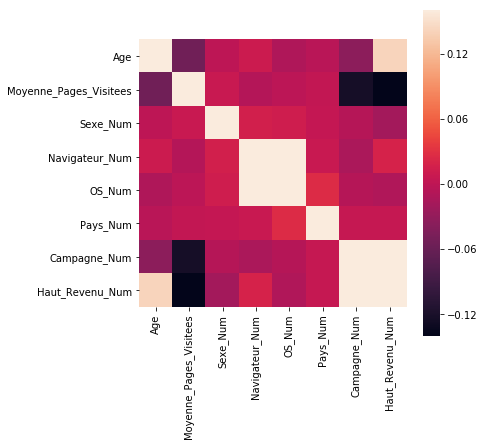

In [23]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corrmat, vmax=.16, square=True);
plt.show()



# Draw a heatmap with the numeric values in each cell
# f, ax = plt.subplots(figsize=(9, 6))
# sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

- on remarque qu'il y a une corrélation entre
       haut_revenu et compagne  
       haut_revenu et âge 
       navigateur et OS
       
 donc on deduit que la compagne influence sur les haut_revenu de site 


In [24]:
features = data.columns[:-1].tolist()# sans haut_revenu
print features

['Age', 'Moyenne_Pages_Visitees', 'Sexe_Num', 'Navigateur_Num', 'OS_Num', 'Pays_Num', 'Campagne_Num']


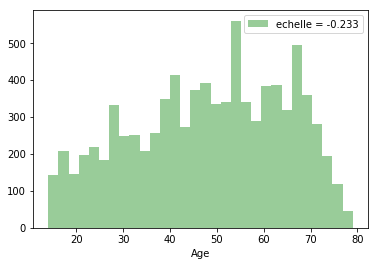

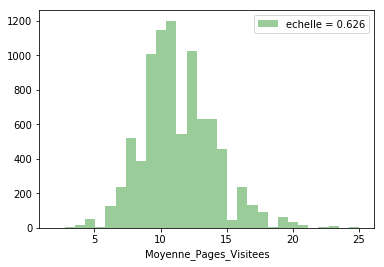

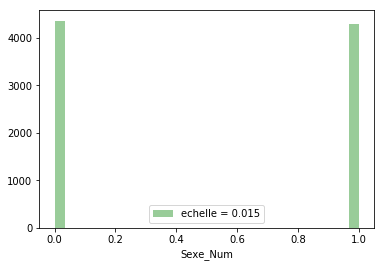

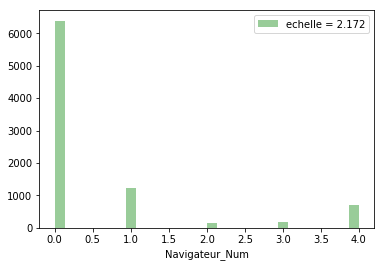

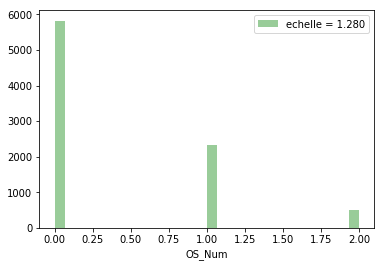

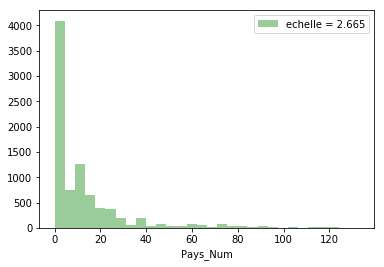

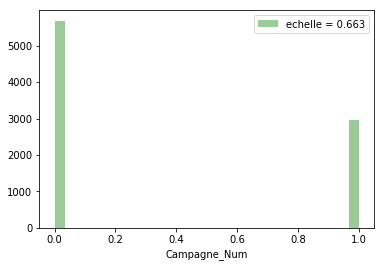

In [25]:

for col in features:
    i=0
    skew = data[col].skew()
    i= sns.distplot(data[col],color='green', kde= False, label='echelle = %.3f' %(skew), bins=30)
    i=+1
    plt.legend()
    plt.show()
 


### détection des outliers
 il est important dans toute analyse de données de détecter les valeurs abérantes qui peuvent conduire notre modèle d'apprentissage en erreurs 

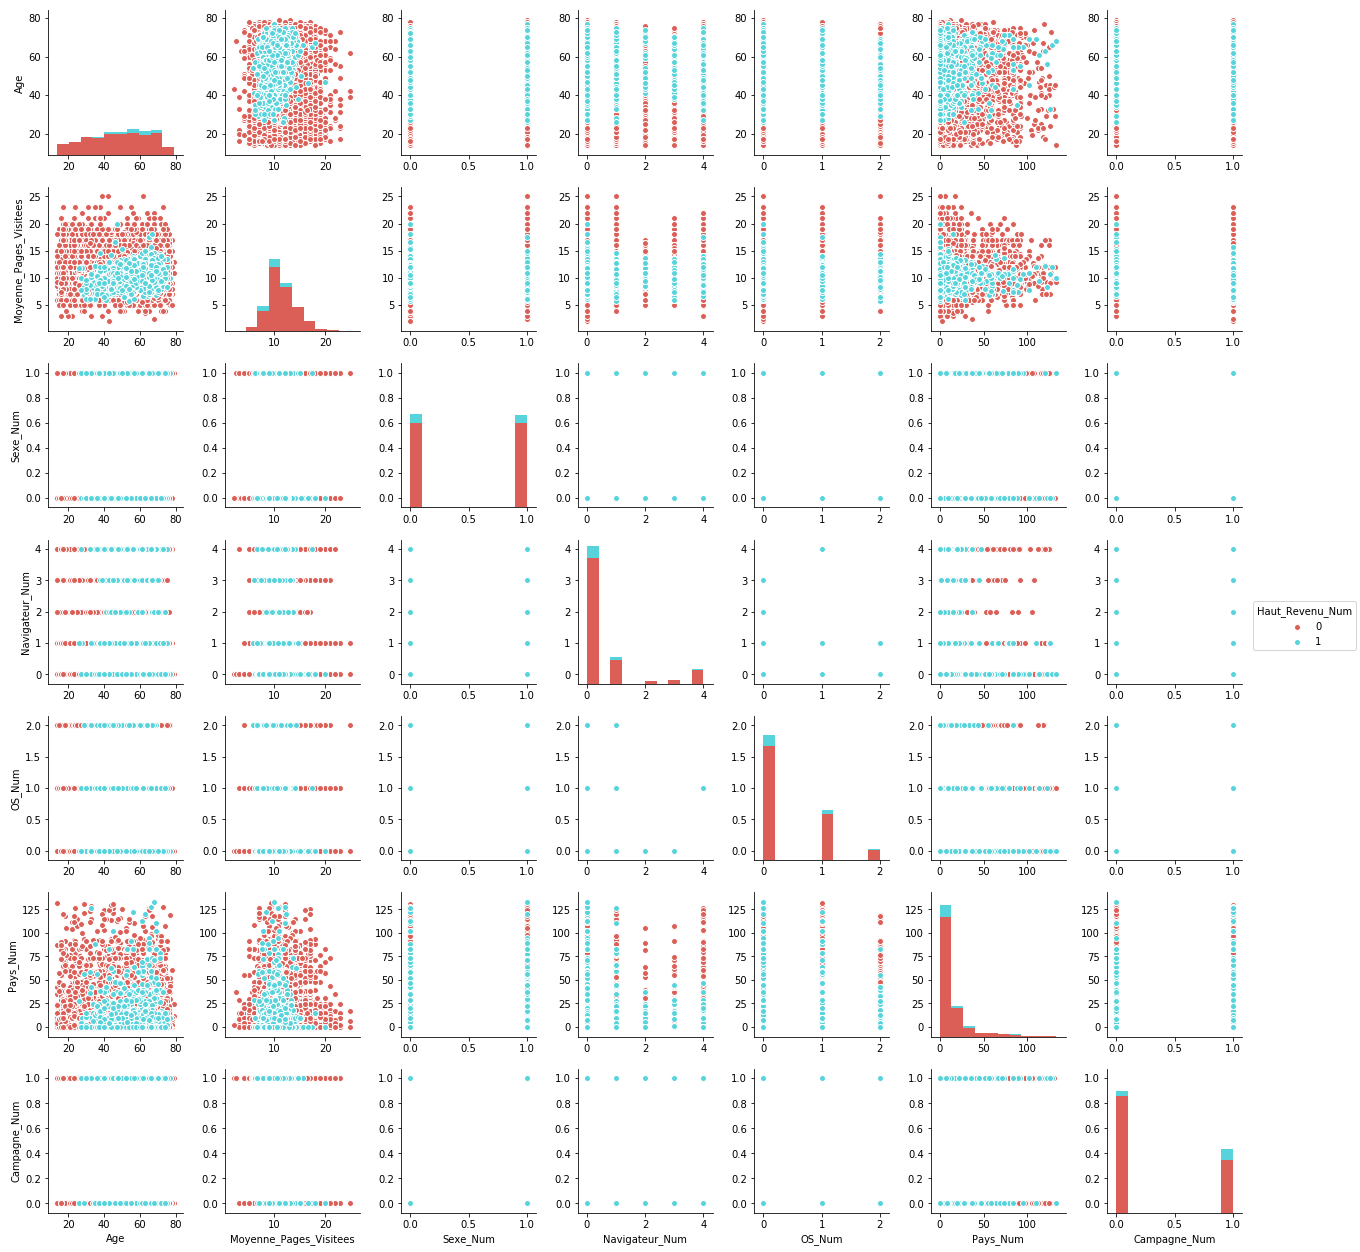

In [26]:
# scatter visualisation
plt.figure()
sns.pairplot(data, hue='Haut_Revenu_Num',palette='hls', vars=["Age", "Moyenne_Pages_Visitees","Sexe_Num","Navigateur_Num","OS_Num","Pays_Num","Campagne_Num"])

plt.show()

In [27]:
def find_outliers_IQR(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [28]:
outlier_indices, outlier_values = find_outliers_IQR(data['Age'])
print(np.sort(outlier_values))

[]


In [29]:


for i in data.columns:
    outlier_indices, outlier_values = find_outliers_IQR(data[i])
    print "les outliers de",i, "sont:"   
    print (outlier_values) 
    print
    
    


les outliers de Age sont:
[]

les outliers de Moyenne_Pages_Visitees sont:
[20.0, 21.0, 20.0, 20.0, 21.0, 19.0, 18.5, 25.0, 21.0, 19.0, 19.0, 22.0, 21.0, 19.0, 19.0, 20.0, 19.0, 23.0, 19.0, 21.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 20.0, 4.0, 20.0, 4.0, 19.0, 20.0, 19.0, 23.0, 23.0, 4.0, 20.0, 20.0, 22.0, 3.0, 3.0, 19.0, 3.0, 20.0, 20.0, 19.0, 20.0, 20.0, 20.0, 18.5, 19.0, 23.0, 4.0, 4.0, 19.0, 22.0, 19.0, 23.0, 19.0, 19.0, 21.0, 19.0, 4.0, 19.0, 19.0, 19.0, 21.0, 21.0, 19.0, 19.0, 20.0, 19.0, 23.0, 3.0, 19.0, 19.0, 19.0, 4.0, 20.0, 21.0, 4.0, 19.5, 2.0, 23.0, 4.0, 2.5, 21.0, 21.0, 22.0, 19.0, 19.0, 19.0, 19.0, 20.0, 19.0, 19.0, 19.0, 20.0, 20.0, 23.0, 19.0, 19.0, 20.0, 21.0, 19.0, 19.0, 19.0, 25.0, 21.0, 20.0, 21.0, 20.0, 19.0, 3.5, 18.5, 4.0, 3.0, 20.0, 20.0, 21.0, 21.0, 19.0, 19.0, 22.0, 21.0, 18.5, 19.0, 19.0, 19.0, 20.0, 19.0, 23.0, 4.0, 25.0, 22.0, 20.0, 19.0, 19.0, 20.0, 20.0, 20.0, 19.0, 19.0, 22.0, 19.0, 19.0, 19.0, 19.0, 4.0, 4.0, 4.0, 19.0, 20.0, 4.0, 19.0, 21.0, 22.0, 20.0,

- séparate train and test data

In [30]:
from sklearn.model_selection import train_test_split
# features = data.columns[:-1].tolist()
X = data[features] 
y = data['Haut_Revenu_Num']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [32]:
print X_test.shape
print y_train.shape

(3028, 7)
(5622,)


In [33]:
# Function to build model and find model performance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def find_model_perf(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test)]
    auc = roc_auc_score(y_test, y_hat)
    
    return auc

In [34]:
# Find performance of model using preprocessed data
auc_processed = find_model_perf(X_train, y_train, X_test, y_test)
print(auc_processed)

0.785789903875
